# 基于相关性的简单因子分析 

In [1]:
from scipy.stats.mstats import winsorize
from scipy.stats import pearsonr,spearmanr,kendalltau
import pandas as pd
import numpy as np

In [2]:
from gm.api import *
set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 获取沪深300所有股票的财务因子

In [4]:
hs300=get_constituents(index='SHSE.000300', fields='symbol, weight', df=True)
hs300

,symbol,weight
0,SZSE.002466,0.44
1,SHSE.601901,0.15
2,SZSE.002475,0.82
3,SHSE.601799,0.10
4,SHSE.601857,0.28
...,...,...
295,SZSE.300782,0.26
296,SZSE.002460,0.53
297,SHSE.601838,0.17
298,SZSE.002459,0.26


In [1]:
#hs300.symbol.tolist()

In [5]:
#注意最高40000条记录的限制
ex2=get_fundamentals(table='trading_derivative_indicator', symbols=hs300.symbol.tolist(), start_date='2016-01-01', end_date='2016-06-01',
                 fields='TCLOSE,NEGOTIABLEMV,TOTMKTCAP,TURNRATE,PELFY,PETTM,PEMRQ,PELFYNPAAEI,PETTMNPAAEI', df=True,limit=40000)
ex2

,symbol,pub_date,end_date,TCLOSE,NEGOTIABLEMV,TOTMKTCAP,TURNRATE,PELFY,PETTM,PEMRQ,PELFYNPAAEI,PETTMNPAAEI
0,SHSE.601012,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,12.36,2.0037e+10,2.1894e+10,1.6311,74.5834,62.4308,66.8032,81.4258,79.4376
1,SHSE.601238,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,20.35,8.5912e+10,8.5912e+10,0.0594,41.1039,36.2214,36.3529,47.1458,44.8516
2,SZSE.300316,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,13.31,1.0792e+10,1.1759e+10,1.2983,178.6724,134.5585,122.7254,193.1035,128.6337
3,SZSE.300347,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,27.80,8.1442e+09,1.2046e+10,1.2533,95.9883,79.6783,81.7557,90.6420,87.2153
4,SHSE.603993,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,4.02,5.2074e+10,5.2074e+10,0.5201,37.2133,67.8822,79.4405,50.0207,79.3375
...,...,...,...,...,...,...,...,...,...,...,...,...
22564,SZSE.002304,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,70.03,8.6399e+10,1.0553e+11,0.5170,19.6702,18.8654,10.7425,21.4678,10.9162
22565,SZSE.002311,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,16.74,2.5560e+10,2.5789e+10,0.8867,33.0636,31.9707,164.4282,35.3513,176.4772
22566,SHSE.601989,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,6.16,1.1062e+11,1.1311e+11,0.5885,-43.1465,-40.4598,133.8134,-33.9623,2289.9270
22567,SHSE.600999,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,16.35,7.8531e+10,9.4963e+10,0.5441,8.7052,10.2610,23.5301,8.7416,23.8195


## classwork1

* 基于上面数据选择2016-01-04这天的PELFY并作图

* 获取中证军工指数代码以及此指数的所有股票，获取其2021-01-01到2021-01-15的市盈率与市值数据

<AxesSubplot:>

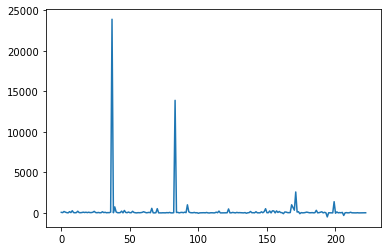

In [8]:
ex2[ex2.end_date=="2016-01-04"].PELFY.plot()

In [9]:
zzjg=get_constituents(index='SZSE.399967', fields='symbol, weight', df=True)
zzjg

,symbol,weight
0,SHSE.603712,1.12
1,SZSE.002268,2.81
2,SZSE.000768,4.16
3,SZSE.300722,0.22
4,SHSE.603678,1.49
...,...,...
59,SZSE.300581,0.28
60,SZSE.300123,0.49
61,SZSE.000738,1.59
62,SZSE.300629,0.20


In [10]:
zzjg_ex=get_fundamentals(table='trading_derivative_indicator', symbols=zzjg.symbol.tolist(), start_date='2021-01-01', end_date='2021-01-15',
                 fields='TOTMKTCAP,PELFY', df=True,limit=40000)
zzjg_ex

,symbol,pub_date,end_date,TOTMKTCAP,PELFY
0,SHSE.600038,2021-01-04 00:00:00+08:00,2021-01-04 00:00:00+08:00,3.9295e+10,66.8029
1,SHSE.600118,2021-01-04 00:00:00+08:00,2021-01-04 00:00:00+08:00,3.9613e+10,118.0295
2,SHSE.600184,2021-01-04 00:00:00+08:00,2021-01-04 00:00:00+08:00,6.3188e+09,102.0016
3,SHSE.600316,2021-01-04 00:00:00+08:00,2021-01-04 00:00:00+08:00,4.2776e+10,516.1919
4,SHSE.600372,2021-01-04 00:00:00+08:00,2021-01-04 00:00:00+08:00,4.0396e+10,72.6522
...,...,...,...,...,...
635,SZSE.002985,2021-01-15 00:00:00+08:00,2021-01-15 00:00:00+08:00,2.6428e+10,124.4868
636,SZSE.300875,2021-01-15 00:00:00+08:00,2021-01-15 00:00:00+08:00,7.0652e+09,74.2682
637,SZSE.003009,2021-01-15 00:00:00+08:00,2021-01-15 00:00:00+08:00,9.5100e+09,96.1116
638,SZSE.300900,2021-01-15 00:00:00+08:00,2021-01-15 00:00:00+08:00,8.9058e+09,119.3027


## 获取单因子

In [11]:
ex2

,symbol,pub_date,end_date,TCLOSE,NEGOTIABLEMV,TOTMKTCAP,TURNRATE,PELFY,PETTM,PEMRQ,PELFYNPAAEI,PETTMNPAAEI
0,SHSE.601012,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,12.36,2.0037e+10,2.1894e+10,1.6311,74.5834,62.4308,66.8032,81.4258,79.4376
1,SHSE.601238,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,20.35,8.5912e+10,8.5912e+10,0.0594,41.1039,36.2214,36.3529,47.1458,44.8516
2,SZSE.300316,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,13.31,1.0792e+10,1.1759e+10,1.2983,178.6724,134.5585,122.7254,193.1035,128.6337
3,SZSE.300347,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,27.80,8.1442e+09,1.2046e+10,1.2533,95.9883,79.6783,81.7557,90.6420,87.2153
4,SHSE.603993,2016-01-04 00:00:00+08:00,2016-01-04 00:00:00+08:00,4.02,5.2074e+10,5.2074e+10,0.5201,37.2133,67.8822,79.4405,50.0207,79.3375
...,...,...,...,...,...,...,...,...,...,...,...,...
22564,SZSE.002304,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,70.03,8.6399e+10,1.0553e+11,0.5170,19.6702,18.8654,10.7425,21.4678,10.9162
22565,SZSE.002311,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,16.74,2.5560e+10,2.5789e+10,0.8867,33.0636,31.9707,164.4282,35.3513,176.4772
22566,SHSE.601989,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,6.16,1.1062e+11,1.1311e+11,0.5885,-43.1465,-40.4598,133.8134,-33.9623,2289.9270
22567,SHSE.600999,2016-06-01 00:00:00+08:00,2016-06-01 00:00:00+08:00,16.35,7.8531e+10,9.4963e+10,0.5441,8.7052,10.2610,23.5301,8.7416,23.8195


In [6]:
ex3=ex2.set_index(["end_date","symbol"])
ex3

pub_date  TCLOSE  \
end_date                  symbol                                          
2016-01-04 00:00:00+08:00 SHSE.601012 2016-01-04 00:00:00+08:00   12.36   
                          SHSE.601238 2016-01-04 00:00:00+08:00   20.35   
                          SZSE.300316 2016-01-04 00:00:00+08:00   13.31   
                          SZSE.300347 2016-01-04 00:00:00+08:00   27.80   
                          SHSE.603993 2016-01-04 00:00:00+08:00    4.02   
...                                                         ...     ...   
2016-06-01 00:00:00+08:00 SZSE.002304 2016-06-01 00:00:00+08:00   70.03   
                          SZSE.002311 2016-06-01 00:00:00+08:00   16.74   
                          SHSE.601989 2016-06-01 00:00:00+08:00    6.16   
                          SHSE.600999 2016-06-01 00:00:00+08:00   16.35   
                          SZSE.300033 2016-06-01 00:00:00+08:00   79.90   

                                       NEGOTIABLEMV   TOTMKTCAP  TURNRATE  \
end_date                  symbol                                            
2016-01-04 00:00:00+08:00 SHSE.601012    2.0037e+10  2.1894e+10    1.6311   
                          SHSE.601238    8.5912e+10  8.5912e+10    0.0594   
                          SZSE.300316    1.0792e+10  1.1759e+10    1.2983   
                          SZSE.300347    8.1442e+09  1.2046e+10    1.2533   
                          SHSE.603993    5.2074e+10  5.2074e+10    0.5201   
...                                             ...         ...       ...   
2016-06-01 00:00:00+08:00 SZSE.002304    8.6399e+10  1.0553e+11    0.5170   
                          SZSE.002311    2.5560e+10  2.5789e+10    0.8867   
                          SHSE.601989    1.1062e+11  1.1311e+11    0.5885   
                          SHSE.600999    7.8531e+10  9.4963e+10    0.5441   
                          SZSE.300033    2.1063e+10  4.2954e+10    7.0221   

                                          PELFY     PETTM     PEMRQ  \
end_date                  symbol                                      
2016-01-04 00:00:00+08:00 SHSE.601012   74.5834   62.4308   66.8032   
                          SHSE.601238   41.1039   36.2214   36.3529   
                          SZSE.300316  178.6724  134.5585  122.7254   
                          SZSE.300347   95.9883   79.6783   81.7557   
                          SHSE.603993   37.2133   67.8822   79.4405   
...                                         ...       ...       ...   
2016-06-01 00:00:00+08:00 SZSE.002304   19.6702   18.8654   10.7425   
                          SZSE.002311   33.0636   31.9707  164.4282   
                          SHSE.601989  -43.1465  -40.4598  133.8134   
                          SHSE.600999    8.7052   10.2610   23.5301   
                          SZSE.300033   44.8738   41.5734   74.7478   

                                       PELFYNPAAEI  PETTMNPAAEI  
end_date                  symbol                                 
2016-01-04 00:00:00+08:00 SHSE.601012      81.4258      79.4376  
                          SHSE.601238      47.1458      44.8516  
                          SZSE.300316     193.1035     128.6337  
                          SZSE.300347      90.6420      87.2153  
                          SHSE.603993      50.0207      79.3375  
...                                            ...          ...  
2016-06-01 00:00:00+08:00 SZSE.002304      21.4678      10.9162  
                          SZSE.002311      35.3513     176.4772  
                          SHSE.601989     -33.9623    2289.9270  
                          SHSE.600999       8.7416      23.8195  
                          SZSE.300033      45.8465      75.4029  

[22569 rows x 10 columns]

In [15]:
ex3.loc[pd.to_datetime("2016-01-04")].PELFY

symbol
SHSE.601012     74.5834
SHSE.601238     41.1039
SZSE.300316    178.6724
SZSE.300347     95.9883
SHSE.603993     37.2133
                 ...   
SHSE.601169      8.1275
SHSE.601186     14.7488
SHSE.601318     15.8467
SHSE.601328      6.8455
SHSE.601390     21.8300
Name: PELFY, Length: 223, dtype: float64

<AxesSubplot:xlabel='symbol'>

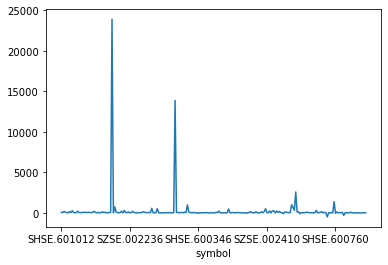

In [7]:
ex3.loc[pd.to_datetime("2016-01-04")].PELFY.plot()

In [8]:
factor=ex3.loc[pd.to_datetime("2016-01-04")].PELFY
factor

symbol
SHSE.603019    212.4834
SZSE.300408     46.6776
SZSE.002736     29.7543
SHSE.601021     50.6955
SZSE.300413     92.7357
                 ...   
SHSE.601288      5.6467
SZSE.002456     42.2197
SZSE.002460    249.7126
SZSE.002463   -804.6454
SHSE.601818      6.5615
Name: PELFY, Length: 250, dtype: float64

## 收益率的计算

* history
* set_index(["eob","symbol"])
* unstack().

## classwork2

* 获得沪深300所有股票2016-01-01到2016-06-01的收盘价，股票代码，交易时间

* 计算此系列股票的收益率(history_data_p)

* 获得2016-01-05所有股票的收益率

In [7]:
history_data=history(symbol=hs300.symbol.tolist(), frequency='1d', start_time='2016-01-01',  end_time='2016-06-01', fields='symbol,close,eob', adjust=ADJUST_PREV, df= True)

In [8]:
history_data_n=history_data.set_index(["eob","symbol"]).unstack().close
history_data_n

symbol,SHSE.600000,SHSE.600009,SHSE.600010,SHSE.600011,SHSE.600015,SHSE.600016,SHSE.600018,SHSE.600019,SHSE.600028,SHSE.600029,...,SZSE.300142,SZSE.300144,SZSE.300274,SZSE.300316,SZSE.300347,SZSE.300408,SZSE.300413,SZSE.300433,SZSE.300450,SZSE.300498
eob,,,,,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00+08:00,10.3391,26.7667,2.3108,6.7075,7.9038,5.8563,5.0912,3.8244,3.3581,7.4287,...,11.8869,14.0882,13.3290,9.9046,18.1614,16.5358,20.7707,13.2373,9.6104,21.5780
2016-01-05 00:00:00+08:00,10.4320,27.2306,2.3675,6.6912,7.9453,5.9146,5.1338,3.9706,3.3300,7.2181,...,11.2586,13.4559,12.9186,9.4135,18.3705,16.4272,19.3836,13.2355,9.9645,22.0834
2016-01-06 00:00:00+08:00,10.5133,27.9313,2.5659,6.8377,7.9591,5.9341,5.2190,4.3655,3.4424,7.4957,...,11.5179,13.8558,13.0698,9.7483,18.6906,16.6538,20.1996,13.6862,9.9706,23.9772
2016-01-07 00:00:00+08:00,10.1706,26.5016,2.3179,6.3412,7.4198,5.5774,4.8188,3.9341,3.2668,7.0362,...,10.6204,12.4778,11.7628,8.8777,17.1227,15.1055,18.1773,12.3343,8.9731,21.6271
2016-01-08 00:00:00+08:00,10.1590,26.5394,2.5163,6.4958,7.4889,5.6423,4.9635,4.3289,3.3511,7.3808,...,10.5207,13.1911,11.8978,8.7884,17.1292,15.3793,17.9208,12.5156,9.0817,23.7908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-26 00:00:00+08:00,10.2810,25.5737,2.0343,5.9423,6.8666,5.8252,4.3165,3.7805,3.3370,6.4044,...,NaN,13.4507,11.2065,6.1453,19.1064,16.3832,14.4882,13.6122,NaN,21.4701
2016-05-27 00:00:00+08:00,10.3042,25.5263,2.0202,5.9179,6.8597,5.8317,4.3165,3.8098,3.3300,6.4044,...,NaN,13.3370,11.1201,6.1154,18.6935,16.2878,14.7213,14.4695,NaN,21.8822
2016-05-30 00:00:00+08:00,10.4262,25.5642,2.0202,5.9586,6.8804,5.8579,4.3505,3.7878,3.3370,6.2704,...,NaN,13.0444,11.1255,6.1154,18.7328,16.4690,14.3716,14.4695,NaN,21.7350


In [9]:
history_data_p=history_data_n/history_data_n.shift(1)-1
history_data_p

symbol,SHSE.600000,SHSE.600009,SHSE.600010,SHSE.600011,SHSE.600015,SHSE.600016,SHSE.600018,SHSE.600019,SHSE.600028,SHSE.600029,...,SZSE.300142,SZSE.300144,SZSE.300274,SZSE.300316,SZSE.300347,SZSE.300408,SZSE.300413,SZSE.300433,SZSE.300450,SZSE.300498
eob,,,,,,,,,,,,,,,,,,,,,
2016-01-04 00:00:00+08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+08:00,0.0090,0.0173,0.0245,-0.0024,0.0052,0.0100,0.0084,0.0382,-0.0084,-0.0284,...,-0.0529,-0.0449,-0.0308,-0.0496,0.0115,-0.0066,-0.0668,-0.0001,0.0368,0.0234
2016-01-06 00:00:00+08:00,0.0078,0.0257,0.0838,0.0219,0.0017,0.0033,0.0166,0.0994,0.0338,0.0385,...,0.0230,0.0297,0.0117,0.0356,0.0174,0.0138,0.0421,0.0340,0.0006,0.0858
2016-01-07 00:00:00+08:00,-0.0326,-0.0512,-0.0967,-0.0726,-0.0678,-0.0601,-0.0767,-0.0988,-0.0510,-0.0613,...,-0.0779,-0.0995,-0.1000,-0.0893,-0.0839,-0.0930,-0.1001,-0.0988,-0.1000,-0.0980
2016-01-08 00:00:00+08:00,-0.0011,0.0014,0.0856,0.0244,0.0093,0.0116,0.0300,0.1004,0.0258,0.0490,...,-0.0094,0.0572,0.0115,-0.0101,0.0004,0.0181,-0.0141,0.0147,0.0121,0.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-26 00:00:00+08:00,0.0017,0.0056,0.0177,-0.0014,0.0010,0.0045,-0.0020,0.0000,0.0085,-0.0191,...,NaN,-0.0084,0.0048,-0.0024,-0.0003,0.0184,-0.0170,0.0366,NaN,-0.0075
2016-05-27 00:00:00+08:00,0.0023,-0.0019,-0.0070,-0.0041,-0.0010,0.0011,0.0000,0.0077,-0.0021,0.0000,...,NaN,-0.0085,-0.0077,-0.0049,-0.0216,-0.0058,0.0161,0.0630,NaN,0.0192
2016-05-30 00:00:00+08:00,0.0118,0.0015,0.0000,0.0069,0.0030,0.0045,0.0079,-0.0058,0.0021,-0.0209,...,NaN,-0.0219,0.0005,0.0000,0.0021,0.0111,-0.0238,0.0000,NaN,-0.0067


In [33]:
#help(history_data.set_index)

In [31]:
history_data_p.loc["2016-01-05"]

symbol
SHSE.600000    0.0090
SHSE.600009    0.0173
SHSE.600010    0.0245
SHSE.600011   -0.0024
SHSE.600015    0.0052
                ...  
SZSE.300408   -0.0066
SZSE.300413   -0.0668
SZSE.300433   -0.0001
SZSE.300450    0.0368
SZSE.300498    0.0234
Name: 2016-01-05 00:00:00+08:00, Length: 223, dtype: float64

## 数据的去极值与标准化

* winsorize(xxx, limits=0.03)

* spearmanr(xxx,xxx)# pvalue要小于0.05才有统计学意义

<AxesSubplot:xlabel='symbol'>

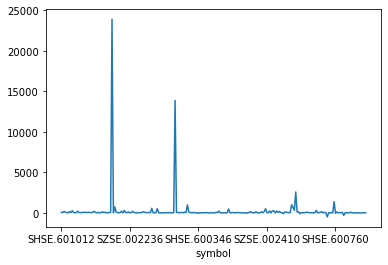

In [32]:
ex3.loc[pd.to_datetime("2016-01-04")].PELFY.plot()

In [39]:
winsorize(ex3.loc[pd.to_datetime("2016-01-04")].PELFY, limits=0.03)

masked_array(data=[ 74.58339691,  41.10390091, 178.6723938 ,  95.98829651,
                    37.2132988 ,  12.07149982, 157.63400269,  46.55820084,
                   273.00839233,  42.85400009,  23.45689964,  41.85660172,
                   212.48339844,  46.67760086,  29.75429916,  50.69549942,
                    92.73570251,  51.78839874,  86.88200378,  41.99980164,
                    86.53309631,  43.02700043,  47.32130051,  84.86840057,
                   196.60629272,  55.16479874,  24.69860077,  59.84970093,
                    26.76519966,  27.64509964, 145.019104  ,  44.13629913,
                    80.84629822,  21.15740013,  43.60720062,  34.81940079,
                   104.07109833, 746.55169678,  24.00709915, 746.55169678,
                   119.92539978,  34.51079941,  23.84519958,  43.10549927,
                   220.17430115,   9.97220039, 309.17590332,  62.04380035,
                    30.66430092, 113.05239868,  34.65449905,  28.9008007 ,
                   203.02

In [34]:
ex3.loc[pd.to_datetime("2016-01-04")].PELFY

symbol
SHSE.601012     74.5834
SHSE.601238     41.1039
SZSE.300316    178.6724
SZSE.300347     95.9883
SHSE.603993     37.2133
                 ...   
SHSE.601169      8.1275
SHSE.601186     14.7488
SHSE.601318     15.8467
SHSE.601328      6.8455
SHSE.601390     21.8300
Name: PELFY, Length: 223, dtype: float64

In [23]:
def standardize_series(series):#标准化
    std = series.std()
    mean = series.mean()
    return (series-mean)/std

In [41]:
standardize_series(ex3.loc[pd.to_datetime("2016-01-04")].PELFY)

symbol
SHSE.601012   -0.0999
SHSE.601238   -0.1179
SZSE.300316   -0.0438
SZSE.300347   -0.0884
SHSE.603993   -0.1200
                ...  
SHSE.601169   -0.1357
SHSE.601186   -0.1321
SHSE.601318   -0.1315
SHSE.601328   -0.1364
SHSE.601390   -0.1283
Name: PELFY, Length: 223, dtype: float64

### classwork 3

* 获取“2016-01-04”的PELFY因子数据与“2016-01-05”的收益数据并合并入一个数据框中
* 对因子数据进行去极值与标准化
* 计算两者的相关性

In [44]:
f_PELFY=ex3.loc[pd.to_datetime("2016-01-04")].PELFY
f_PELFY

symbol
SHSE.601012     74.5834
SHSE.601238     41.1039
SZSE.300316    178.6724
SZSE.300347     95.9883
SHSE.603993     37.2133
                 ...   
SHSE.601169      8.1275
SHSE.601186     14.7488
SHSE.601318     15.8467
SHSE.601328      6.8455
SHSE.601390     21.8300
Name: PELFY, Length: 223, dtype: float64

In [51]:
p1=history_data_p.loc["2016-01-05"]
p1.name="r"

In [62]:
f_p=pd.concat([f_PELFY,p1],axis=1).dropna()
f_p

,PELFY,r
symbol,,
SHSE.601012,74.5834,-0.0388
SHSE.601238,41.1039,0.0388
SZSE.300316,178.6724,-0.0496
SZSE.300347,95.9883,0.0115
SHSE.603993,37.2133,-0.0199
...,...,...
SHSE.601169,8.1275,0.0060
SHSE.601186,14.7488,-0.0170
SHSE.601318,15.8467,0.0132


In [63]:
f_p["PELFY_w"]=winsorize(f_p.PELFY,limits=0.03)

<AxesSubplot:xlabel='symbol'>

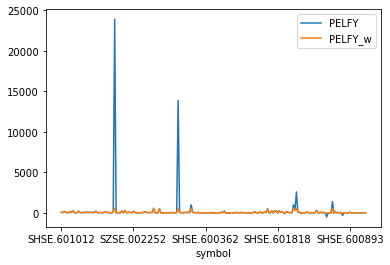

In [64]:
f_p[["PELFY","PELFY_w"]].plot()

In [65]:
f_p["PELFY_w_s"]=standardize_series(f_p.PELFY_w)

In [66]:
f_p

,PELFY,r,PELFY_w,PELFY_w_s
symbol,,,,
SHSE.601012,74.5834,-0.0388,74.5834,-0.0055
SHSE.601238,41.1039,0.0388,41.1039,-0.2815
SZSE.300316,178.6724,-0.0496,178.6724,0.8525
SZSE.300347,95.9883,0.0115,95.9883,0.1709
SHSE.603993,37.2133,-0.0199,37.2133,-0.3136
...,...,...,...,...
SHSE.601169,8.1275,0.0060,8.1275,-0.5533
SHSE.601186,14.7488,-0.0170,14.7488,-0.4987
SHSE.601318,15.8467,0.0132,15.8467,-0.4897


In [67]:
spearmanr(f_p.r,f_p.PELFY_w_s)

SpearmanrResult(correlation=-0.1468832340854654, pvalue=0.03254796828126154)

<AxesSubplot:xlabel='symbol'>

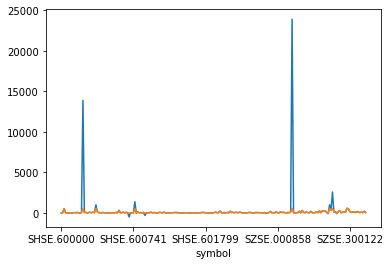

In [31]:
f_y.iloc[:,1].plot()
f_y.iloc[:,2].plot()

,2016-01-05 00:00:00+08:00,PELFY,PELFY_w,PELFY_w_s
symbol,,,,
SHSE.600000,0.0090,7.0606,7.0606,-0.5621
SHSE.600009,0.0173,25.9958,25.9958,-0.4060
SHSE.600010,0.0245,529.8723,529.8723,3.7476
SHSE.600011,-0.0024,11.8769,11.8769,-0.5224
SHSE.600015,0.0052,6.7925,6.7925,-0.5643
...,...,...,...,...
SZSE.300408,-0.0066,46.6776,46.6776,-0.2355
SZSE.300413,-0.0668,92.7357,92.7357,0.1441
SZSE.300433,-0.0001,43.0270,43.0270,-0.2656


SpearmanrResult(correlation=-0.1468832340854654, pvalue=0.03254796828126154)

In [38]:
#spearmanr(f_y_1.iloc[:,0],f_y_1["PELFY_s"])

## 计算所有天所有因子与收益率的相关性

### classwork 4

* 获取收益率并让其值后移一位，然后通过stack方法，让symbol变为行标。
* 通过循环把所有因子列标准化与去极值
* 收益与因子合并为一个数据框以保证索引对齐
* 计算所有因子列与收益的相关性

In [17]:
h_m=history_data_p.shift(-1).stack()

In [18]:
h_m

eob                        symbol     
2016-01-04 00:00:00+08:00  SHSE.600000    0.0090
                           SHSE.600009    0.0173
                           SHSE.600010    0.0245
                           SHSE.600011   -0.0024
                           SHSE.600015    0.0052
                                           ...  
2016-05-31 00:00:00+08:00  SZSE.300347   -0.0043
                           SZSE.300408   -0.0176
                           SZSE.300413    0.0038
                           SZSE.300433    0.0999
                           SZSE.300498   -0.0055
Length: 20995, dtype: float64

In [11]:
ex3.columns

Index(['pub_date', 'TCLOSE', 'NEGOTIABLEMV', 'TOTMKTCAP', 'TURNRATE', 'PELFY',
       'PETTM', 'PEMRQ', 'PELFYNPAAEI', 'PETTMNPAAEI'],
      dtype='object')

In [20]:
ex3

pub_date  TCLOSE  \
end_date                  symbol                                          
2016-01-04 00:00:00+08:00 SHSE.601012 2016-01-04 00:00:00+08:00   12.36   
                          SHSE.601238 2016-01-04 00:00:00+08:00   20.35   
                          SZSE.300316 2016-01-04 00:00:00+08:00   13.31   
                          SZSE.300347 2016-01-04 00:00:00+08:00   27.80   
                          SHSE.603993 2016-01-04 00:00:00+08:00    4.02   
...                                                         ...     ...   
2016-06-01 00:00:00+08:00 SZSE.002304 2016-06-01 00:00:00+08:00   70.03   
                          SZSE.002311 2016-06-01 00:00:00+08:00   16.74   
                          SHSE.601989 2016-06-01 00:00:00+08:00    6.16   
                          SHSE.600999 2016-06-01 00:00:00+08:00   16.35   
                          SZSE.300033 2016-06-01 00:00:00+08:00   79.90   

                                       NEGOTIABLEMV   TOTMKTCAP  TURNRATE  \
end_date                  symbol                                            
2016-01-04 00:00:00+08:00 SHSE.601012    2.0037e+10  2.1894e+10    1.6311   
                          SHSE.601238    8.5912e+10  8.5912e+10    0.0594   
                          SZSE.300316    1.0792e+10  1.1759e+10    1.2983   
                          SZSE.300347    8.1442e+09  1.2046e+10    1.2533   
                          SHSE.603993    5.2074e+10  5.2074e+10    0.5201   
...                                             ...         ...       ...   
2016-06-01 00:00:00+08:00 SZSE.002304    8.6399e+10  1.0553e+11    0.5170   
                          SZSE.002311    2.5560e+10  2.5789e+10    0.8867   
                          SHSE.601989    1.1062e+11  1.1311e+11    0.5885   
                          SHSE.600999    7.8531e+10  9.4963e+10    0.5441   
                          SZSE.300033    2.1063e+10  4.2954e+10    7.0221   

                                          PELFY     PETTM     PEMRQ  \
end_date                  symbol                                      
2016-01-04 00:00:00+08:00 SHSE.601012   74.5834   62.4308   66.8032   
                          SHSE.601238   41.1039   36.2214   36.3529   
                          SZSE.300316  178.6724  134.5585  122.7254   
                          SZSE.300347   95.9883   79.6783   81.7557   
                          SHSE.603993   37.2133   67.8822   79.4405   
...                                         ...       ...       ...   
2016-06-01 00:00:00+08:00 SZSE.002304   19.6702   18.8654   10.7425   
                          SZSE.002311   33.0636   31.9707  164.4282   
                          SHSE.601989  -43.1465  -40.4598  133.8134   
                          SHSE.600999    8.7052   10.2610   23.5301   
                          SZSE.300033   44.8738   41.5734   74.7478   

                                       PELFYNPAAEI  PETTMNPAAEI  
end_date                  symbol                                 
2016-01-04 00:00:00+08:00 SHSE.601012      81.4258      79.4376  
                          SHSE.601238      47.1458      44.8516  
                          SZSE.300316     193.1035     128.6337  
                          SZSE.300347      90.6420      87.2153  
                          SHSE.603993      50.0207      79.3375  
...                                            ...          ...  
2016-06-01 00:00:00+08:00 SZSE.002304      21.4678      10.9162  
                          SZSE.002311      35.3513     176.4772  
                          SHSE.601989     -33.9623    2289.9270  
                          SHSE.600999       8.7416      23.8195  
                          SZSE.300033      45.8465      75.4029  

[22569 rows x 10 columns]

In [21]:
ex3.columns

Index(['pub_date', 'TCLOSE', 'NEGOTIABLEMV', 'TOTMKTCAP', 'TURNRATE', 'PELFY',
       'PETTM', 'PEMRQ', 'PELFYNPAAEI', 'PETTMNPAAEI'],
      dtype='object')

In [27]:
for i in ex3.columns[1:]:
    z1=winsorize(ex3[i],limits=0.03)
    ex3[i+"s"]=standardize_series(z1)
    print(i)

TCLOSE
NEGOTIABLEMV
TOTMKTCAP
TURNRATE
PELFY
PETTM
PEMRQ
PELFYNPAAEI
PETTMNPAAEI


In [28]:
ex3

pub_date  TCLOSE  \
end_date                  symbol                                          
2016-01-04 00:00:00+08:00 SHSE.601012 2016-01-04 00:00:00+08:00   12.36   
                          SHSE.601238 2016-01-04 00:00:00+08:00   20.35   
                          SZSE.300316 2016-01-04 00:00:00+08:00   13.31   
                          SZSE.300347 2016-01-04 00:00:00+08:00   27.80   
                          SHSE.603993 2016-01-04 00:00:00+08:00    4.02   
...                                                         ...     ...   
2016-06-01 00:00:00+08:00 SZSE.002304 2016-06-01 00:00:00+08:00   70.03   
                          SZSE.002311 2016-06-01 00:00:00+08:00   16.74   
                          SHSE.601989 2016-06-01 00:00:00+08:00    6.16   
                          SHSE.600999 2016-06-01 00:00:00+08:00   16.35   
                          SZSE.300033 2016-06-01 00:00:00+08:00   79.90   

                                       NEGOTIABLEMV   TOTMKTCAP  TURNRATE  \
end_date                  symbol                                            
2016-01-04 00:00:00+08:00 SHSE.601012    2.0037e+10  2.1894e+10    1.6311   
                          SHSE.601238    8.5912e+10  8.5912e+10    0.0594   
                          SZSE.300316    1.0792e+10  1.1759e+10    1.2983   
                          SZSE.300347    8.1442e+09  1.2046e+10    1.2533   
                          SHSE.603993    5.2074e+10  5.2074e+10    0.5201   
...                                             ...         ...       ...   
2016-06-01 00:00:00+08:00 SZSE.002304    8.6399e+10  1.0553e+11    0.5170   
                          SZSE.002311    2.5560e+10  2.5789e+10    0.8867   
                          SHSE.601989    1.1062e+11  1.1311e+11    0.5885   
                          SHSE.600999    7.8531e+10  9.4963e+10    0.5441   
                          SZSE.300033    2.1063e+10  4.2954e+10    7.0221   

                                          PELFY     PETTM     PEMRQ  \
end_date                  symbol                                      
2016-01-04 00:00:00+08:00 SHSE.601012   74.5834   62.4308   66.8032   
                          SHSE.601238   41.1039   36.2214   36.3529   
                          SZSE.300316  178.6724  134.5585  122.7254   
                          SZSE.300347   95.9883   79.6783   81.7557   
                          SHSE.603993   37.2133   67.8822   79.4405   
...                                         ...       ...       ...   
2016-06-01 00:00:00+08:00 SZSE.002304   19.6702   18.8654   10.7425   
                          SZSE.002311   33.0636   31.9707  164.4282   
                          SHSE.601989  -43.1465  -40.4598  133.8134   
                          SHSE.600999    8.7052   10.2610   23.5301   
                          SZSE.300033   44.8738   41.5734   74.7478   

                                       PELFYNPAAEI  PETTMNPAAEI  TCLOSEs  \
end_date                  symbol                                           
2016-01-04 00:00:00+08:00 SHSE.601012      81.4258      79.4376  -0.5240   
                          SHSE.601238      47.1458      44.8516  -0.0234   
                          SZSE.300316     193.1035     128.6337  -0.4644   
                          SZSE.300347      90.6420      87.2153   0.4434   
                          SHSE.603993      50.0207      79.3375  -1.0465   
...                                            ...          ...      ...   
2016-06-01 00:00:00+08:00 SZSE.002304      21.4678      10.9162   2.9777   
                          SZSE.002311      35.3513     176.4772  -0.2495   
                          SHSE.601989     -33.9623    2289.9270  -0.9124   
                          SHSE.600999       8.7416      23.8195  -0.2740   
                          SZSE.300033      45.8465      75.4029   2.9777   

                                       NEGOTIABLEMVs  TOTMKTCAPs  TURNRATEs  \
end_date                  symbol                                              
2016-0

In [29]:
f_y_1=pd.concat([h_m,ex3],axis=1).dropna()
f_y_1

0                  pub_date  \
                          symbol                                          
2016-01-04 00:00:00+08:00 SHSE.600000  0.0090 2016-01-04 00:00:00+08:00   
                          SHSE.600009  0.0173 2016-01-04 00:00:00+08:00   
                          SHSE.600010  0.0245 2016-01-04 00:00:00+08:00   
                          SHSE.600011 -0.0024 2016-01-04 00:00:00+08:00   
                          SHSE.600015  0.0052 2016-01-04 00:00:00+08:00   
...                                       ...                       ...   
2016-05-31 00:00:00+08:00 SZSE.300347 -0.0043 2016-05-31 00:00:00+08:00   
                          SZSE.300408 -0.0176 2016-05-31 00:00:00+08:00   
                          SZSE.300413  0.0038 2016-05-31 00:00:00+08:00   
                          SZSE.300433  0.0999 2016-05-31 00:00:00+08:00   
                          SZSE.300498 -0.0055 2016-05-31 00:00:00+08:00   

                                       TCLOSE  NEGOTIABLEMV   TOTMKTCAP  \
                          symbol                                          
2016-01-04 00:00:00+08:00 SHSE.600000   17.80    3.3203e+11  3.3203e+11   
                          SHSE.600009   28.27    3.0913e+10  5.4475e+10   
                          SHSE.600010    3.26    5.1319e+10  1.0615e+11   
                          SHSE.600011    8.24    8.6520e+10  8.6520e+10   
                          SHSE.600015   11.43    8.8985e+10  1.2214e+11   
...                                       ...           ...         ...   
2016-05-31 00:00:00+08:00 SZSE.300347   29.93    8.8221e+09  1.4089e+10   
                          SZSE.300408   17.65    1.7158e+10  3.0493e+10   
                          SZSE.300413   26.38    5.2411e+09  1.0578e+10   
                          SZSE.300433   84.77    5.8089e+09  6.1645e+10   
                          SZSE.300498   45.98    1.1860e+10  1.6669e+11   

                                       TURNRATE     PELFY     PETTM     PEMRQ  \
                          symbol                                                
2016-01-04 00:00:00+08:00 SHSE.600000    0.2264    7.0606    6.7228    6.7010   
                          SHSE.600009    0.5438   25.9958   22.3117   21.2274   
                          SHSE.600010    0.4411  529.8723  -89.8978  -60.0904   
                          SHSE.600011    0.1380   11.8769    9.0861    7.0979   
                          SHSE.600015    0.5152    6.7925    6.5258    6.5844   
...                                         ...       ...       ...       ...   
2016-05-31 00:00:00+08:00 SZSE.300347    1.4475   90.1553   87.7247   87.5989   
                          SZSE.300408    1.8085   34.9031   32.6501   33.9000   
                          SZSE.300413   13.4511  111.2391  125.7525  209.9004   
                          SZSE.300433    8.5575   39.9576   47.3421   93.3829   
                          SZSE.300498    2.7765   26.8621   19.1115   13.4760   

                                       PELFYNPAAEI  PETTMNPAAEI  TCLOSEs  \
                          symbol                                           
2016-01-04 00:00:00+08:00 SHSE.600000       7.1175       6.8409  -0.1831   
                          SHSE.600009      25.9998      21.6989   0.4728   
                          SHSE.600010     370.8709     -35.1244  -1.0853   
                          SHSE.600011      11.8454       7.3287  -0.7821   
                          SHSE.600015       6.8187       6.6010  -0.5822   
...                                            ...          ...      ...   
2016-05-31 00:00:00+08:00 SZSE.300347      92.8805      96.7649   0.5769   
                          SZSE.300408      38.2361      37.9030  -0.1925   
                          SZSE.300413     123.7053     235.9985   0.3544   
                          SZSE.300433      56.2521    -207.5025   2.9777   
                          SZSE.300498      27.2262      13.4638   1.5824   

                                       NEGOTIABLE

In [30]:
f_y_1.columns

Index([              0,      'pub_date',        'TCLOSE',  'NEGOTIABLEMV',
           'TOTMKTCAP',      'TURNRATE',         'PELFY',         'PETTM',
               'PEMRQ',   'PELFYNPAAEI',   'PETTMNPAAEI',       'TCLOSEs',
       'NEGOTIABLEMVs',    'TOTMKTCAPs',     'TURNRATEs',        'PELFYs',
              'PETTMs',        'PEMRQs',  'PELFYNPAAEIs',  'PETTMNPAAEIs'],
      dtype='object')

In [33]:
f_y_1.iloc[:,0]

                           symbol     
2016-01-04 00:00:00+08:00  SHSE.600000    0.0090
                           SHSE.600009    0.0173
                           SHSE.600010    0.0245
                           SHSE.600011   -0.0024
                           SHSE.600015    0.0052
                                           ...  
2016-05-31 00:00:00+08:00  SZSE.300347   -0.0043
                           SZSE.300408   -0.0176
                           SZSE.300413    0.0038
                           SZSE.300433    0.0999
                           SZSE.300498   -0.0055
Name: 0, Length: 20995, dtype: float64

In [34]:
spearmanr(f_y_1.iloc[:,0],f_y_1["PELFY_s"])

SpearmanrResult(correlation=-0.00251890169052677, pvalue=0.7151420682022427)

In [31]:
for i in f_y_1.columns[11:]:
    print(i,spearmanr(f_y_1.iloc[:,0],f_y_1[i]))
#pvalue <0.5

TCLOSEs SpearmanrResult(correlation=0.0024304070380963302, pvalue=0.7247354747216616)
NEGOTIABLEMVs SpearmanrResult(correlation=-0.030925994390608693, pvalue=7.399044672333684e-06)
TOTMKTCAPs SpearmanrResult(correlation=-0.03365402703222736, pvalue=1.0747022097519771e-06)
TURNRATEs SpearmanrResult(correlation=-0.03952031836447587, pvalue=1.0147006651214881e-08)
PELFYs SpearmanrResult(correlation=-0.002518884387190176, pvalue=0.715143939665623)
PETTMs SpearmanrResult(correlation=-0.0035982048599351017, pvalue=0.6021313412906157)
PEMRQs SpearmanrResult(correlation=-0.00016186368529837246, pvalue=0.9812896565060665)
PELFYNPAAEIs SpearmanrResult(correlation=0.0013786251791810065, pvalue=0.8416790911062658)
PETTMNPAAEIs SpearmanrResult(correlation=-0.0008896404229984172, pvalue=0.8974382427465999)


In [49]:
for i in f_y_1.columns[11:]:
    print(i,spearmanr(f_y_1.iloc[:,0],f_y_1[i]))

TCLOSE_s SpearmanrResult(correlation=0.0024304166954637993, pvalue=0.7247344254055343)
NEGOTIABLEMV_s SpearmanrResult(correlation=-0.030925985754399386, pvalue=7.399088096295342e-06)
TOTMKTCAP_s SpearmanrResult(correlation=-0.03365401602689061, pvalue=1.0747109020400367e-06)
TURNRATE_s SpearmanrResult(correlation=-0.03952035069213699, pvalue=1.0146726222505042e-08)
PELFY_s SpearmanrResult(correlation=-0.00251890169052677, pvalue=0.7151420682022427)
PETTM_s SpearmanrResult(correlation=-0.0035982210286692345, pvalue=0.6021297096182836)
PEMRQ_s SpearmanrResult(correlation=-0.00016186225178023872, pvalue=0.9812898221806594)
PELFYNPAAEI_s SpearmanrResult(correlation=0.0013786326988221758, pvalue=0.8416782389760336)
PETTMNPAAEI_s SpearmanrResult(correlation=-0.0008896371306300021, pvalue=0.8974386202083917)


## 多因子选股策略

* 基于因子排序的序号，进行加权求和，看总分数的排序